# Sample cuts

In [1]:
import snpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import glob

from multiprocessing import Pool

%config InlineBackend.figure_format = 'retina'
print(f'SNooPy version: v{snpy.__version__}')

SNOOPY_MODEL = 'max_model'
DATA_DIR = 'csp_data'
PROCESSES = 8

SNooPy version: v2.6.0


___
## Testing SNooPy

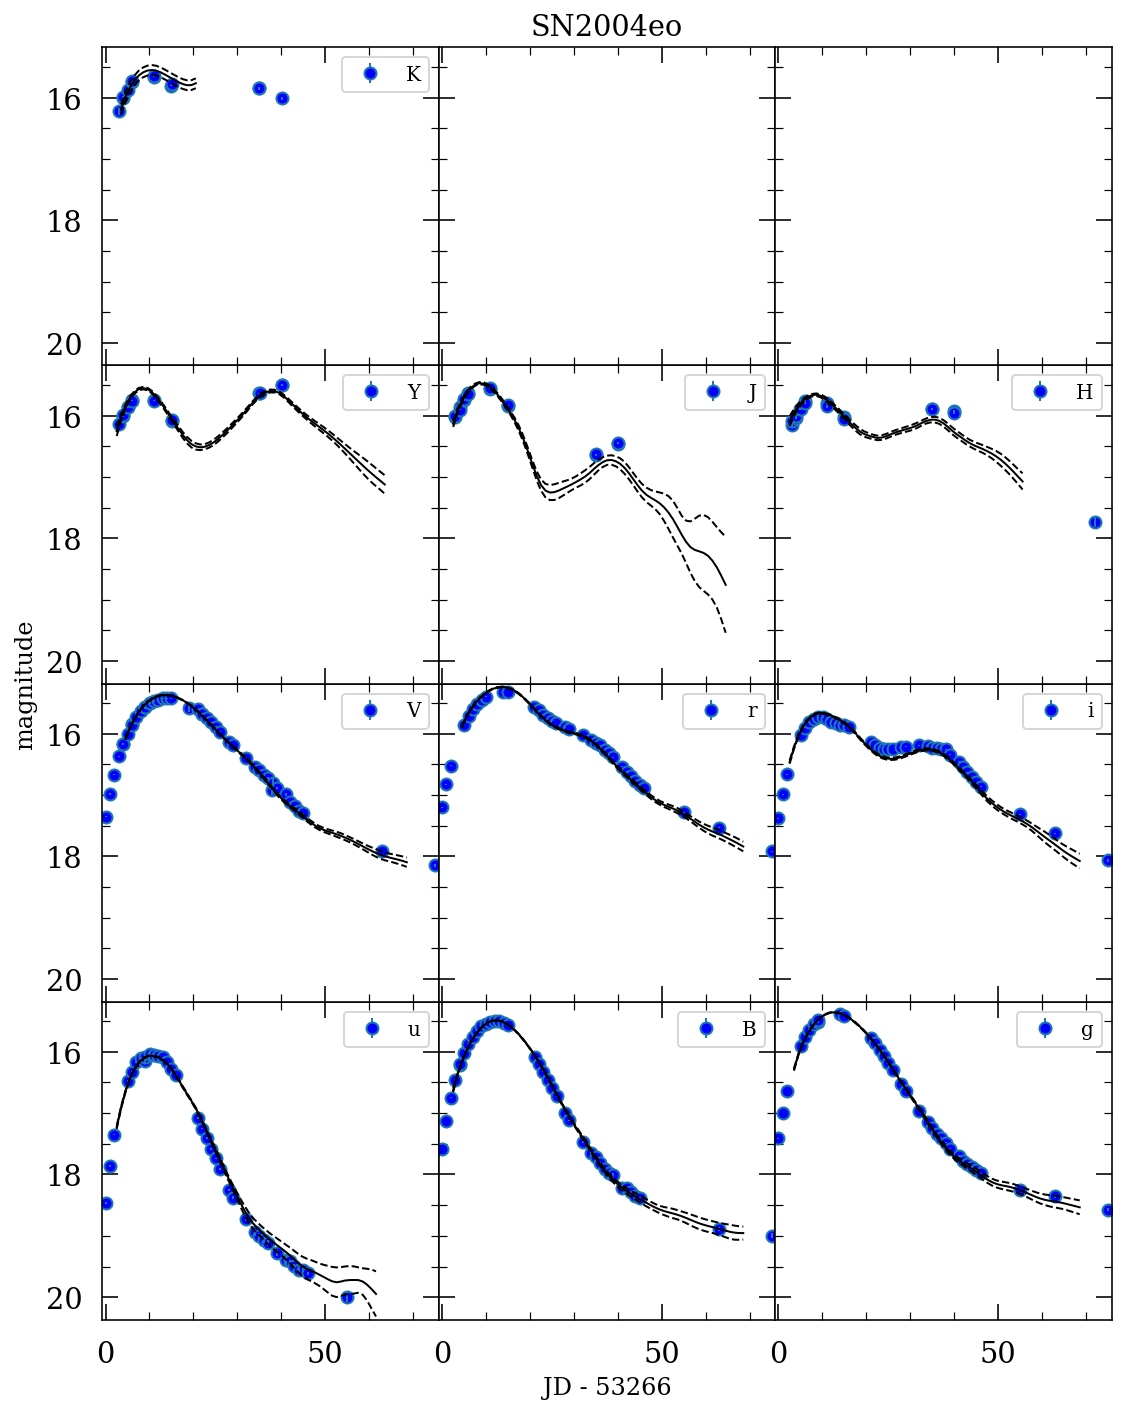

In [4]:
sn_name = 'SN2004eo'
sn_file = os.path.join(DATA_DIR, f'{sn_name}_snpy.txt')
sn = snpy.import_lc(sn_file)
                 
sn.choose_model(SNOOPY_MODEL)
sn.fit()

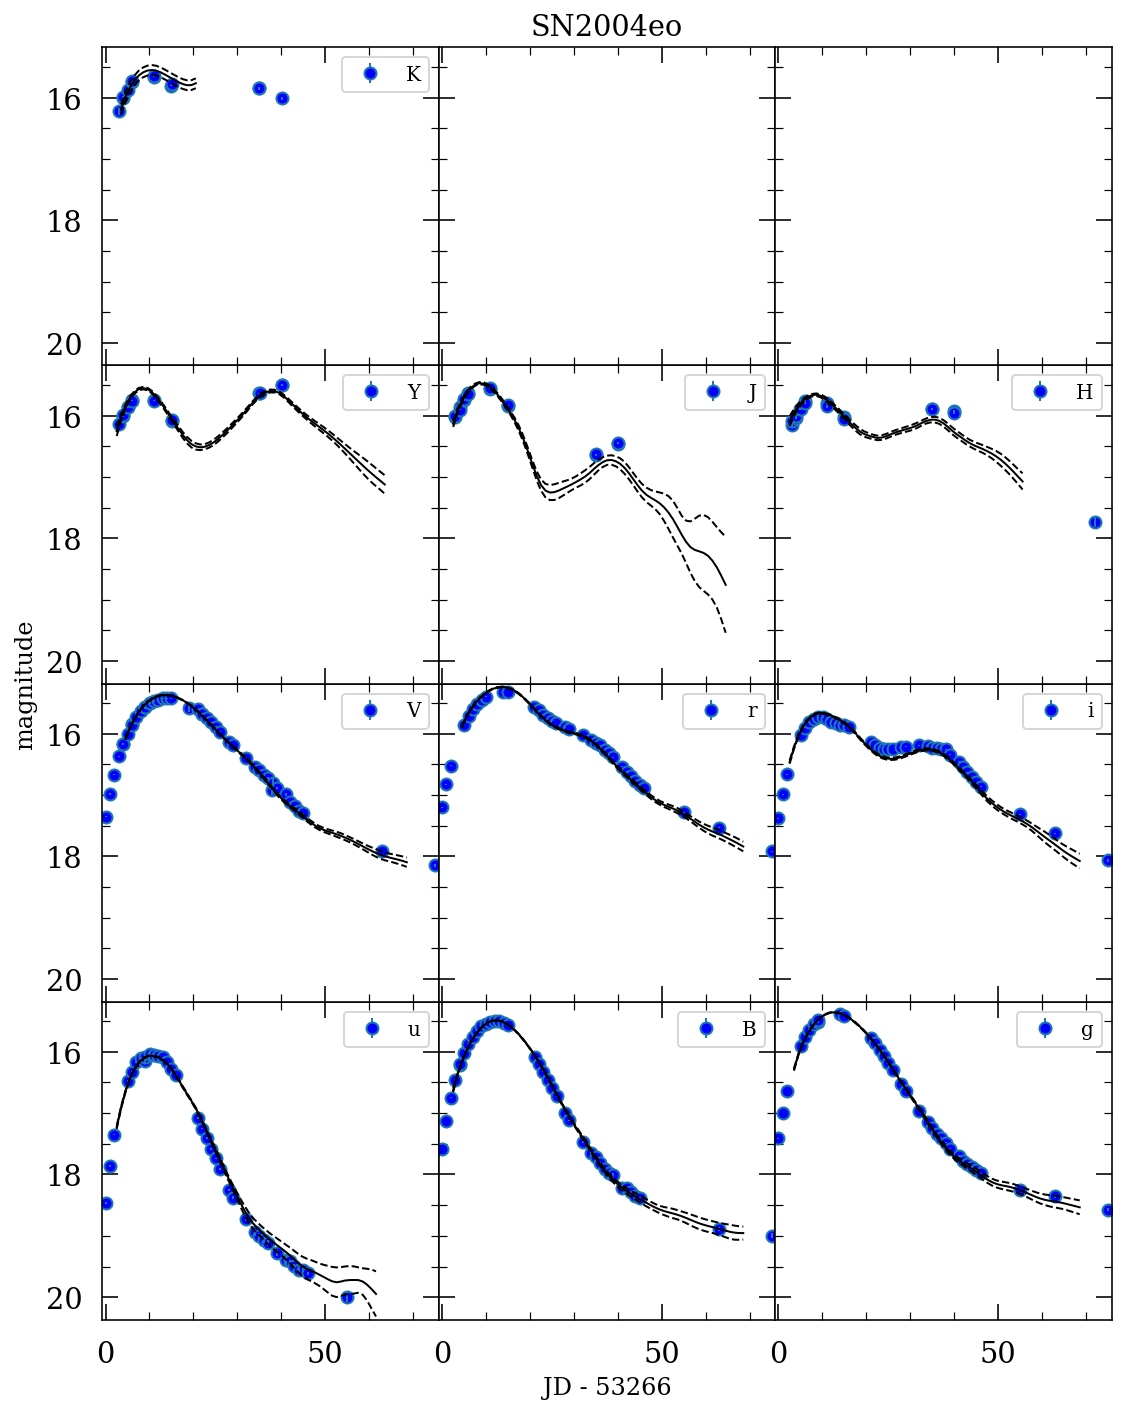

In [5]:
sn.plot(outfile='paper_plots/snoopy_fit.pdf')

In [3]:
sn.summary()

--------------------------------------------------------------------------------
SN  SN2004eo
z = 0.0157          zcmb = 0.0147          ra=308.22580         dec=  9.92850 
Data in the following bands: g,  r,  i,  u,  B,  V,  J,  H,  K,  Y,  
Fit results (if any):
   st = 0.819  +/-  0.005  +/- 0.030 (sys)
   Tmax = 53278.558  +/-  0.039  +/- 0.340 (sys)
   gmax = 15.034  +/-  0.008  +/- 0.014 (sys)
   rmax = 15.026  +/-  0.007  +/- 0.022 (sys)
   imax = 15.525  +/-  0.009  +/- 0.022 (sys)
   umax = 15.568  +/-  0.013  +/- 0.030 (sys)
   Bmax = 15.114  +/-  0.007  +/- 0.012 (sys)
   Vmax = 15.060  +/-  0.008  +/- 0.019 (sys)
   Jmax = 15.418  +/-  0.028  +/- 0.044 (sys)
   Hmax = 15.626  +/-  0.038  +/- 0.055 (sys)
   Kmax = 15.581  +/-  0.090
   Ymax = 15.475  +/-  0.025  +/- 0.050 (sys)


___
## SNe with g, J and H bands

All SNe have B, V and r bands (tested)

In [30]:
def extract_bands(sn_file):
    """Reads a SN file with SNooPy format and
    extracts the bands/filters used.
    
    Parameters
    ==========
    sn_file: str
        SN file in SNooPy format.

    Returns
    =======
    bands: list
        List of bands for a given SN.
    """
    
    bands = []
    with open(sn_file, 'r') as file:
        for line in file:
            if 'filter' in line:
                band = line.split()[-1]
                bands.append(band)
                
    return bands

In [11]:
# abnormal SNe according to Krisciunas+17 and/or Ashall+20
abnormal_sne = {'06gz-like':['2004gu'],
                '06bt-like':['2006bt', '2006ot'],
                '86G-like':['2006hb', '2007jh', '2007mm', '2007ux'],
                '91T-like':['2005M', '2005eq', '2007S', '2007ai', '2008fw',
                            'LSQ12gdj', 'SN2014eg', 'SN2014dl', 'ASAS14kd'],
                '91bg-like':['2005bl', '2005ke', '2006bd', '2006gt', '2006mr', 
                             '2007N', '2007al', '2007ax', '2007ba', '2008bd', 
                             '2008bi', '2008bt', '2009F', 'LSQ14ip', 'KISS15m', 
                             'SN2016hnk', 'SN2015bo', 'LSQ11pn'],
                'Ia-CSM':['2005gj', '2008J'],
                'Iax':['2005hk', '2008ae', '2008ha', '2009J', '2010ae', 'SN2012Z', 
                       'PTF14ans', 'SN2014ek'],  # aka 02cx-like
                '03fg-like':['SN2006gz', '2007if', '2009dc', 'LSQ14fmg', 'ASAS15hy', 
                             'SN2013ao', 'MLS140102', 'ASAS15pz', 'SN2012dn'],
                'others':['2005ir', '2007cg', '2007hj'],  # labelled as ... in Krisciunas+17
}

# extract a flat list of all the SNe, except for the 91T-like
abnormal_list = [sn for subtype in abnormal_sne.values() for sn in subtype
                                     if sn not in abnormal_sne['91T-like']]

sn_files = [file for file in glob.glob(f'{DATA_DIR}/*.txt')]
abnormal_sne_with_lcs = {subtype:[sn for sn in sn_list 
                                  if sn in ''.join(sn_files)] 
                         for subtype, sn_list in abnormal_sne.items()}
for subtype, sn_list in abnormal_sne_with_lcs.items():
    print(f'{subtype}: {len(sn_list)} SNe')

06gz-like: 1 SNe
06bt-like: 0 SNe
86G-like: 4 SNe
91T-like: 9 SNe
91bg-like: 16 SNe
Ia-CSM: 0 SNe
Iax: 0 SNe
03fg-like: 0 SNe
others: 3 SNe


In [13]:
sn_files = [file for file in glob.glob(f'{DATA_DIR}/*.txt')]
abnormal_sne_files = []

for sn_file in sn_files:
    for ab_sn in abnormal_list:
        if ab_sn in sn_file:
            abnormal_sne_files.append(sn_file)

count = len(abnormal_sne_files)    
print(f'{count} SNe out of {len(sn_files)} are not normal or 91T-like SNe.')              

24 SNe out of 336 are not normal or 91T-like SNe.


In [25]:
csp1_sne, csp2_sne = [], []
for sn_file in abnormal_sne_files:
    if sn_file.startswith('csp_data/SN200'):
        csp1_sne.append(sn_file)
    else:
        csp2_sne.append(sn_file)
print(f'{len(csp1_sne)} SNe from CSP I and {len(csp2_sne)} SNe from CSP II were removed')

21 SNe from CSP I and 3 SNe from CSP II were removed


In [33]:
sn_files = [file for file in glob.glob(f'{DATA_DIR}/*.txt')
               if file not in abnormal_sne_files]

print(f'Starting with {len(sn_files)} normal and 91T-like SNe.')

count = 0
sne_wo_g = []
sne_wo_r = []
with open('sne_wo_JorH.txt', 'w') as fout:
    for sn_file in sn_files:
        file_basename = sn_file.split('/')[-1]
        sn_name = file_basename.split('_')[0]
        bands = extract_bands(sn_file)

        missing_bands = [band for band in ['g', 'r', 'J', 'H'] 
                                         if band not in bands]
        if len(missing_bands)>0:
            print(f'{sn_name} does not have {missing_bands} ---> {bands}')
            bands_str = ''.join(band+'-' for band in bands)[:-1]
            fout.write(f'{sn_name} \t{bands_str}\n')
            count += 1
            
        if 'g' in missing_bands:
            sne_wo_g.append(sn_name)
        if 'r' in missing_bands:
            sne_wo_r.append(sn_name)
            
print(f'{count} SNe out of {len(sn_files)} without g, J or H bands.')        
print(f'{len(sne_wo_g)} SNe without g band and {len(sne_wo_r)} SNe without r band')

Starting with 312 normal and 91T-like SNe.
SN2011jt does not have ['J', 'H'] ---> ['B', 'V', 'i', 'g', 'r', 'u']
SN2009P does not have ['H'] ---> ['g', 'r', 'i', 'u', 'V', 'B', 'Y', 'J']
CSP13abm does not have ['J', 'H'] ---> ['B', 'V', 'g', 'r', 'i', 'u']
LSQ12cda does not have ['J', 'H'] ---> ['V', 'B', 'i', 'r', 'g', 'Y']
PTF14uo does not have ['g', 'J', 'H'] ---> ['V', 'B', 'r', 'i', 'Y']
SN2014at does not have ['J', 'H'] ---> ['i', 'r', 'g', 'u', 'V', 'B']
PTF13dwl does not have ['J', 'H'] ---> ['V', 'B', 'g', 'r', 'i', 'u', 'Y']
PTF13dyt does not have ['g', 'J', 'H'] ---> ['B', 'V', 'r', 'i', 'Y']
SN2012G does not have ['J', 'H'] ---> ['r', 'i', 'g', 'u', 'B', 'V']
SN2012hl does not have ['g', 'J', 'H'] ---> ['B', 'V', 'r', 'i']
SN2005hj does not have ['H'] ---> ['g', 'r', 'i', 'u', 'V', 'B', 'Y', 'J']
SN2006ef does not have ['J', 'H'] ---> ['g', 'r', 'i', 'u', 'V', 'B']
LSQ12hvj does not have ['g'] ---> ['Y', 'H', 'J', 'B', 'V', 'r', 'i']
SN2008bz does not have ['H'] ---> ['V', 

In [26]:
csp1_sne, csp2_sne = [], []
with open('sne_wo_JorH.txt', 'r') as fout:
    for line in fout:
        sn = line.split()[0]
        if sn.startswith('SN200'):
            csp1_sne.append(sn)
        else:
            csp2_sne.append(sn)
print(f'{len(csp1_sne)} SNe from CSP I and {len(csp2_sne)} SNe from CSP II were removed')

21 SNe from CSP I and 123 SNe from CSP II were removed


## SNe with coverage around optical peak

First we remove those SNe without J or H bands found above.
To have "good" coverage of the optical peak, we requiere to have at least one data point 2 days before B band maximum in observed B, g, V or r bands.

In [8]:
def check_opt_peak(sn_file):
    '''Fits a SN with SNooPy and checks whether the optical
    peak is covered.
    
    Parameters
    ==========
    sn_file: str
        SN file in SNooPy format.

    Returns
    =======
    The SN name if the peak is not covered.
    '''
    
    sn = snpy.import_lc(sn_file)

    # remove bands with no photometry (no idea why they are empty)
    for band in sn.allbands():
        band_mag = sn.data[band].magnitude
        if len(band_mag)==0:
            sn.data.pop(band)

    # fit opt bands only for quicker results
    bands2fit = [band for band in ['B', 'g', 'V', 'r'] 
                     if band in sn.allbands()]
    if sn.name in ['SN2005ke', 'SN2006mr']:
        bands2fit = ['B', 'g', 'V']
    sn.choose_model(SNOOPY_MODEL)

    try:
        sn.fit(bands2fit)
    except Exception as message:
        print(f'Unable to fit {sn.name}: {message}')
        return sn.name

    # check if there is optical coverage before B max
    opt_peak_covered = False
    for band in sn.allbands():
        if band in ['B', 'g', 'V', 'r']:
            times = sn.data[band].get_t()  # observed epochs
            # we require data at least 2 days before optical peak
            if np.any(times<=-2):
                opt_peak_covered = True
                break

    # save the plots of the SNe w/o optical peak coverage
    if not opt_peak_covered:
        print(f'{sn.name} does not have coverage before B max')
        sn.plot(outfile=f'opt_cuts_fits/{sn.name}.jpeg')
        return sn.name

In [9]:
# SNe to remove
df = pd.read_csv('sne_wo_JorH.txt', names=['name', 'bands'], delim_whitespace=True)
files2remove = [f'{DATA_DIR}/{name}_snpy.txt' for name in df.name.values] + abnormal_sne_files

sn_files = [file for file in glob.glob(f'{DATA_DIR}/*.txt') if file not in files2remove]

In [10]:
print(f'Fitting {len(sn_files)} SNe ({len(files2remove)} SNe removed so far after cuts)')
results_opt = Pool(PROCESSES).map(check_opt_peak, (sn_file for sn_file in sn_files))

with open('sne_wo_opt_max.txt', 'w') as fout:   
    for sn_name in results_opt:
        if sn_name is not None:
            fout.write(sn_name + '\n')
        
cuts_count = len([sn_name for sn_name in results_opt if sn_name is not None])
print(f'\n{cuts_count} SNe without optical peak coverage (some are discarded for other reasons)')

Fitting 168 SNe (168 SNe removed so far after cuts)
SN2008cc does not have coverage before B max
SN2013hn does not have coverage before B max
SN2006br does not have coverage before B max
SN2008cf does not have coverage before B max
ASAS15dd does not have coverage before B max
SN2008ff does not have coverage before B max
SN2006ev does not have coverage before B max
PS1-14ra does not have coverage before B max
SN2008hu does not have coverage before B max
PTF11pra does not have coverage before B max
SN2014dn does not have coverage before B max
ASAS15fr does not have coverage before B max
Unable to fit SN2013bc: All weights for filter g are zero. The fitter is in a part of parameter space where the model is not valid or there is no useful data.
SN2013az does not have coverage before B max
SN2007as does not have coverage before B max
SN2008bq does not have coverage before B max
SN2013ay does not have coverage before B max
ASAS15al does not have coverage before B max
ASAS14jg does not have c

In [27]:
csp1_sne, csp2_sne = [], []
with open('sne_wo_opt_max.txt', 'r') as fout:
    for line in fout:
        sn = line.split()[0]
        if sn.startswith('SN200'):
            csp1_sne.append(sn)
        else:
            csp2_sne.append(sn)
print(f'{len(csp1_sne)} SNe from CSP I and {len(csp2_sne)} SNe from CSP II were removed')

29 SNe from CSP I and 23 SNe from CSP II were removed


There are two main errors when the fits fail:
        
1) `RuntimeError: Error:  Covariance Matrix is singular. Either two or more parameters are degenerate or the model has become insensitive to one or more parameters.`

2) `RuntimeError: All weights for filter X are zero. The fitter is in a part of parameter space where the model is not valid or there is no useful data.` (for different filters)

Note that SN2013bc and SN2014ba fail, but they do not have B-band peak coverage.

___
## SNe w/o NIR peak coverage

We need to remove those SNe without J or H bands and those without optical peak coverage first.
Then we can see which SNe have their NIR peak covered.

In [11]:
def check_NIR_peak(sn_file):
    '''Fits a SN with SNooPy and checks whether the NIR
    peak is covered.
    
    Parameters
    ==========
    sn_file: str
        SN file in SNooPy format.

    Returns
    =======
    The SN name if the peak is not covered.
    '''
    
    sn = snpy.import_lc(sn_file)
    sn.choose_model(SNOOPY_MODEL)

    if sn.name=='SN2008fp':
        sn.data.pop('K')

    try:
        sn.fit()
    except Exception as message:
        try:
            split_mssg = message.args[0].split()
            filt_ind = split_mssg.index('filter') + 1
            filt = split_mssg[filt_ind]
            if filt not in ['J', 'H']:
                sn.data.pop(filt)
                sn.fit()
            else:
                print(f'Unable to fit {sn.name}: {message}')
                return  sn.name
        except Exception as message2:
            print(f'Unable to fit {sn.name}: {message}')
            return  sn.name

    # check if there is NIR coverage before NIR max
    nir_peak_covered = False
    for band in sn.allbands():
        if band in ['J', 'H']:

            model_times = np.arange(sn.Tmax-20, sn.Tmax+40, 0.1)
            model_mag, _, mask = sn.model(band, model_times)
            model_phases  = model_times[mask]-sn.Tmax 
            model_mag = model_mag[mask]

            phases = sn.data[band].get_t()  # observed phases w.r.t. Tmax
            first_epoch = phases[0]
            last_epoch = phases[-1]

            peak_model_id = np.argmin(model_mag)
            peak_model_phase = model_phases[peak_model_id]

            if first_epoch<peak_model_phase and last_epoch>peak_model_phase:
                nir_peak_covered = True
                break

    # save the plots of the SNe w/o optical peak coverage
    if not nir_peak_covered:
        print(f'{sn.name} does not have coverage before NIR max')
        sn.plot(outfile=f'nir_cuts_fits/{sn.name}.jpeg')
        return sn.name

In [12]:
# SNe to remove
df1 = pd.read_csv('sne_wo_JorH.txt', names=['name', 'bands'], delim_whitespace=True)
df2 = pd.read_csv('sne_wo_opt_max.txt', names=['name', 'comment'], delim_whitespace=True)
del_df = pd.concat([df1, df2])
files2remove = [f'{DATA_DIR}/{name}_snpy.txt' for name in list(del_df.name.values)] + abnormal_sne_files

sn_files = [file for file in glob.glob(f'{DATA_DIR}/*.txt') if file not in files2remove]

In [13]:
print(f'Fitting {len(sn_files)} SNe ({len(files2remove)} SNe removed so far after cuts)')
results_NIR = Pool(PROCESSES).map(check_NIR_peak, (sn_file for sn_file in sn_files))

with open('sne_wo_nir_max.txt', 'w') as fout:   
    for sn_name in results_NIR:
        if sn_name is not None:
            fout.write(sn_name + '\n')
        
cuts_count = len([sn_name for sn_name in results_NIR if sn_name is not None])
print(f'\n{cuts_count} SNe without NIR peak coverage (some are discarded for other reasons)')

Fitting 116 SNe (220 SNe removed so far after cuts)
KISS15n does not have coverage before NIR max
SN2005iq does not have coverage before NIR max
SN2006D does not have coverage before NIR max
CSP14adc does not have coverage before NIR max
PS1-14xw does not have coverage before NIR max
SN2009ad does not have coverage before NIR max
PTF11pbp does not have coverage before NIR max
SN2008gl does not have coverage before NIR max
SN2013E does not have coverage before NIR max
SN2013H does not have coverage before NIR max
ASAS15ga does not have coverage before NIR max
SN2007bc does not have coverage before NIR max
PS15sv does not have coverage before NIR max
SN2009cz does not have coverage before NIR max
SN2009le does not have coverage before NIR max
LSQ14gov does not have coverage before NIR max
SN2006ob does not have coverage before NIR max
Failed to connect to IRSA.  E(B-V) query failed
Failed to connect to IRSA.  E(B-V) query failed
Failed to connect to IRSA.  E(B-V) query failed
Failed to c

SN CSP15aae fails, but doesn't have data before NIR peak.

In [28]:
csp1_sne, csp2_sne = [], []
with open('sne_wo_nir_max.txt', 'r') as fout:
    for line in fout:
        sn = line.split()[0]
        if sn.startswith('SN200'):
            csp1_sne.append(sn)
        else:
            csp2_sne.append(sn)
print(f'{len(csp1_sne)} SNe from CSP I and {len(csp2_sne)} SNe from CSP II were removed')

18 SNe from CSP I and 43 SNe from CSP II were removed


### save reference files

In [14]:
# SNe to remove
df1 = pd.read_csv('sne_wo_JorH.txt', names=['name', 'bands'], delim_whitespace=True)
df2 = pd.read_csv('sne_wo_opt_max.txt', names=['name', 'comment'], delim_whitespace=True)
df3 = pd.read_csv('sne_wo_nir_max.txt', names=['name', 'comment'], delim_whitespace=True)
del_df = pd.concat([df1, df2, df3])
files2remove = [f'{DATA_DIR}/{name}_snpy.txt' for name in list(del_df.name.values)] + abnormal_sne_files

sn_files = [file for file in glob.glob(f'{DATA_DIR}/*.txt') if file not in files2remove]
print(f'{len(sn_files)} SNe left and {len(files2remove)} SNe removed after cuts')

# save reference files into an output file
with open('reference_files.txt', 'w') as outfile:
    for sn_file in sn_files:
        outfile.write(sn_file + '\n')

55 SNe left and 281 SNe removed after cuts
